In [ ]:
import pandas as pd
import numpy as np

In [ ]:
d1 = pd.read_csv('application_test.csv')
d2 = pd.read_csv('application_train.csv')

In [ ]:
data1 = d1[['SK_ID_CURR', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL']]
data1.sort_values("SK_ID_CURR")

,SK_ID_CURR,CODE_GENDER,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL
0,100001,F,Married,House / apartment,Working,135000.0
1,100005,M,Married,House / apartment,Working,99000.0
2,100013,M,Married,House / apartment,Working,202500.0
3,100028,F,Married,House / apartment,Working,315000.0
4,100038,M,Married,House / apartment,Working,180000.0
...,...,...,...,...,...,...
48739,456221,F,Widow,House / apartment,Working,121500.0
48740,456222,F,Married,House / apartment,Commercial associate,157500.0
48741,456223,F,Married,House / apartment,Commercial associate,202500.0
48742,456224,M,Married,House / apartment,Commercial associate,225000.0


In [ ]:
data2 = d2[['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL']]
data2.sort_values("SK_ID_CURR")

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL
0,100002,1,M,Single / not married,House / apartment,Working,202500.0
1,100003,0,F,Married,House / apartment,State servant,270000.0
2,100004,0,M,Single / not married,House / apartment,Working,67500.0
3,100006,0,F,Civil marriage,House / apartment,Working,135000.0
4,100007,0,M,Single / not married,House / apartment,Working,121500.0
...,...,...,...,...,...,...,...
307506,456251,0,M,Separated,With parents,Working,157500.0
307507,456252,0,F,Widow,House / apartment,Pensioner,72000.0
307508,456253,0,F,Separated,House / apartment,Working,153000.0
307509,456254,1,F,Married,House / apartment,Commercial associate,171000.0


In [ ]:
data_appl = pd.concat([data1, data2]).sort_values('SK_ID_CURR')
data_appl

,SK_ID_CURR,CODE_GENDER,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,TARGET
0,100001,F,Married,House / apartment,Working,135000.0,NaN
0,100002,M,Single / not married,House / apartment,Working,202500.0,1.0
1,100003,F,Married,House / apartment,State servant,270000.0,0.0
2,100004,M,Single / not married,House / apartment,Working,67500.0,0.0
1,100005,M,Married,House / apartment,Working,99000.0,NaN
...,...,...,...,...,...,...,...
307506,456251,M,Separated,With parents,Working,157500.0,0.0
307507,456252,F,Widow,House / apartment,Pensioner,72000.0,0.0
307508,456253,F,Separated,House / apartment,Working,153000.0,0.0
307509,456254,F,Married,House / apartment,Commercial associate,171000.0,1.0


In [ ]:
dataku = data_appl[data_appl["TARGET"].notna()].drop_duplicates()
dataku

,SK_ID_CURR,CODE_GENDER,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,TARGET
0,100002,M,Single / not married,House / apartment,Working,202500.0,1.0
1,100003,F,Married,House / apartment,State servant,270000.0,0.0
2,100004,M,Single / not married,House / apartment,Working,67500.0,0.0
3,100006,F,Civil marriage,House / apartment,Working,135000.0,0.0
4,100007,M,Single / not married,House / apartment,Working,121500.0,0.0
...,...,...,...,...,...,...,...
307506,456251,M,Separated,With parents,Working,157500.0,0.0
307507,456252,F,Widow,House / apartment,Pensioner,72000.0,0.0
307508,456253,F,Separated,House / apartment,Working,153000.0,0.0
307509,456254,F,Married,House / apartment,Commercial associate,171000.0,1.0


In [ ]:
dataku[dataku["CODE_GENDER"].str.contains('XNA')]

,SK_ID_CURR,CODE_GENDER,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,TARGET
35657,141289,XNA,Married,Municipal apartment,Working,207000.0,0.0
38566,144669,XNA,Married,House / apartment,Working,157500.0,0.0
83382,196708,XNA,Married,House / apartment,Working,135000.0,0.0
189640,319880,XNA,Civil marriage,House / apartment,Commercial associate,247500.0,0.0


In [ ]:
dataku[dataku['CODE_GENDER'].str.contains('XNA')]
dataku.replace('XNA', np.nan, inplace = True)
dataqu = dataku[dataku['CODE_GENDER'].notna()]
dataqu

,SK_ID_CURR,CODE_GENDER,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,TARGET
0,100002,M,Single / not married,House / apartment,Working,202500.0,1.0
1,100003,F,Married,House / apartment,State servant,270000.0,0.0
2,100004,M,Single / not married,House / apartment,Working,67500.0,0.0
3,100006,F,Civil marriage,House / apartment,Working,135000.0,0.0
4,100007,M,Single / not married,House / apartment,Working,121500.0,0.0
...,...,...,...,...,...,...,...
307506,456251,M,Separated,With parents,Working,157500.0,0.0
307507,456252,F,Widow,House / apartment,Pensioner,72000.0,0.0
307508,456253,F,Separated,House / apartment,Working,153000.0,0.0
307509,456254,F,Married,House / apartment,Commercial associate,171000.0,1.0


In [ ]:
dataqu[dataqu['NAME_FAMILY_STATUS'].str.contains('Unknown')]
dataqu.replace('Unknown', np.nan, inplace = True)
data = dataqu[dataqu['NAME_FAMILY_STATUS'].notna()]
data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,SK_ID_CURR,CODE_GENDER,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,TARGET
0,100002,M,Single / not married,House / apartment,Working,202500.0,1.0
1,100003,F,Married,House / apartment,State servant,270000.0,0.0
2,100004,M,Single / not married,House / apartment,Working,67500.0,0.0
3,100006,F,Civil marriage,House / apartment,Working,135000.0,0.0
4,100007,M,Single / not married,House / apartment,Working,121500.0,0.0
...,...,...,...,...,...,...,...
307506,456251,M,Separated,With parents,Working,157500.0,0.0
307507,456252,F,Widow,House / apartment,Pensioner,72000.0,0.0
307508,456253,F,Separated,House / apartment,Working,153000.0,0.0
307509,456254,F,Married,House / apartment,Commercial associate,171000.0,1.0


In [ ]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
data['TARGET'].value_counts()

0.0    282680
1.0     24825
Name: TARGET, dtype: int64

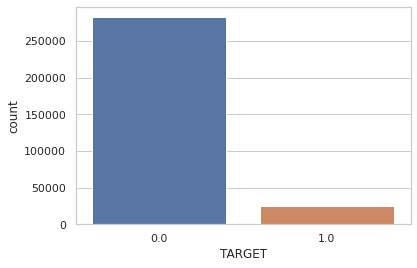

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='TARGET', data=data)
plt.show()
plt.savefig('count_plot')

In [ ]:
count_no_diff = len(data[data['TARGET']==0])
count_diff = len(data[data['TARGET']==1])
pct_of_no_diff = count_no_diff/(count_no_diff+count_diff)
print("percentage of no subscription is", pct_of_no_diff*100)
pct_of_diff = count_diff/(count_no_diff+count_diff)
print("percentage of subscription is", pct_of_diff*100)

percentage of no subscription is 91.92696053722703
percentage of subscription is 8.073039462772963


In [ ]:
data.groupby('TARGET').mean()

,SK_ID_CURR,AMT_INCOME_TOTAL
TARGET,,
0.0,278246.163584,169076.360183
1.0,277449.167936,165611.760906


Pelanggan tidak memiliki kesulitan membayar memiliki rata-rata pendapatan 169077.722266.

Pelanggan yang memiliki kesulitan membayar memiliki rata-rata pendapatan 165611.760906.

In [ ]:
data.groupby('NAME_INCOME_TYPE').mean()

,SK_ID_CURR,AMT_INCOME_TOTAL,TARGET
NAME_INCOME_TYPE,,,
Businessman,275396.900000,652500.000000,0.000000
Commercial associate,278308.971095,202951.261966,0.074846
Maternity leave,323323.600000,140400.000000,0.400000
Pensioner,278487.338517,136401.292273,0.053864
State servant,278907.823573,179737.969506,0.057550
Student,257344.777778,170500.000000,0.000000
Unemployed,254450.636364,110536.363636,0.363636
Working,277923.104490,163169.826300,0.095887


Pelanggan dengan profesi sebagai Businessman memiliki  rata-rata pendapatan 652600 dengan TARGET = 0.

Pelanggan dengan profesi sebagai Commercial associate memiliki rata-rata pendapatan 202955.327289 dengan TARGET = 0.074843.

Pelanggan dengan profesi sebagai Maternity leave memiliki rata-rata pendapatan 140400 dengan TARGET = 0.4.

Pelanggan dengan profesi sebagai Pensioner memiliki rata-rata pendapatan 136401.292273 dengan TARGET = 0.053864.

Pelanggan dengan profesi sebagai State servant memiliki rata-rata pendapatan 179737.969506 dengan TARGET = 0.057550.

Pelanggan dengan profesi sebagai Student memiliki rata-rata pendapatan 170500 dengan TARGET = 0.

Pelanggan dengan profesi sebagai Unemployed memiliki rata-rata pendapatan 110536.363636 dengan TARGET = 0.363636.

Pelanggan dengan profesi sebagai Working memiliki rata-rata pendapatan 163169.889223 dengan TARGET = 0.095885.

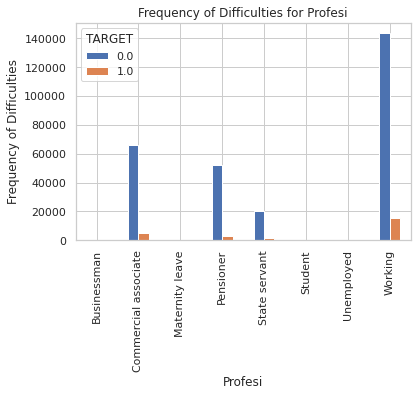

In [ ]:
pd.crosstab(data['NAME_INCOME_TYPE'],data['TARGET']).plot(kind='bar')
plt.title('Frequency of Difficulties for Profesi')
plt.xlabel('Profesi')
plt.ylabel('Frequency of Difficulties')
plt.savefig('profesi')

In [ ]:
data.groupby('CODE_GENDER').mean()

,SK_ID_CURR,AMT_INCOME_TOTAL,TARGET
CODE_GENDER,,,
F,278235.771723,156032.079717,0.069994
M,278077.860211,193394.039659,0.101420


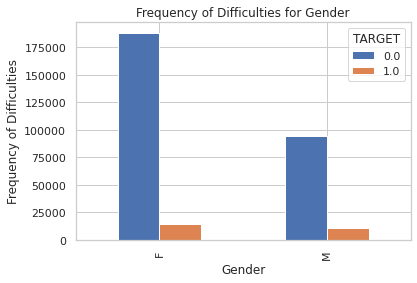

In [ ]:
pd.crosstab(data['CODE_GENDER'],data['TARGET']).plot(kind='bar')
plt.title('Frequency of Difficulties for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Difficulties')
plt.savefig('gender')

In [ ]:
data.groupby('NAME_FAMILY_STATUS').mean()

,SK_ID_CURR,AMT_INCOME_TOTAL,TARGET
NAME_FAMILY_STATUS,,,
Civil marriage,278268.452072,167837.859180,0.099449
Married,277876.255716,171012.423819,0.075600
Separated,278947.553111,171231.793475,0.081942
Single / not married,279023.364735,167919.870329,0.098077
Widow,278434.253978,143001.647132,0.058242


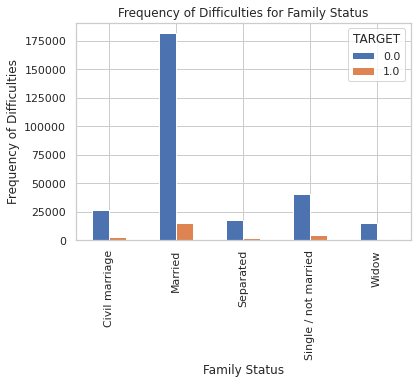

In [ ]:
pd.crosstab(data['NAME_FAMILY_STATUS'],data['TARGET']).plot(kind='bar')
plt.title('Frequency of Difficulties for Family Status')
plt.xlabel('Family Status')
plt.ylabel('Frequency of Difficulties')
plt.savefig('family status')

In [ ]:
data.groupby('NAME_HOUSING_TYPE').mean()

,SK_ID_CURR,AMT_INCOME_TOTAL,TARGET
NAME_HOUSING_TYPE,,,
Co-op apartment,278765.719251,167651.322193,0.079323
House / apartment,278112.387376,169227.476938,0.077958
Municipal apartment,277913.978893,167974.225114,0.085413
Office apartment,278482.433703,187906.542988,0.065724
Rented apartment,281031.256915,167460.213891,0.123131
With parents,278625.958086,158651.069555,0.116981


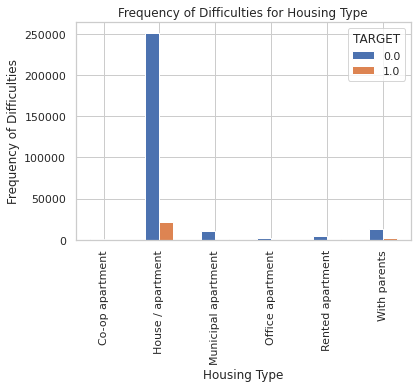

In [ ]:
pd.crosstab(data['NAME_HOUSING_TYPE'],data['TARGET']).plot(kind='bar')
plt.title('Frequency of Difficulties for Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Frequency of Difficulties')
plt.savefig('housing type')

In [ ]:
data_final = pd.get_dummies(data)
data_final

,SK_ID_CURR,AMT_INCOME_TOTAL,TARGET,CODE_GENDER_F,CODE_GENDER_M,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,...,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working
0,100002,202500.0,1.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,100003,270000.0,0.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,100004,67500.0,0.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,100006,135000.0,0.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,100007,121500.0,0.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,157500.0,0.0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
307507,456252,72000.0,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
307508,456253,153000.0,0.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
307509,456254,171000.0,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
data_final.columns.values

array(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'TARGET', 'CODE_GENDER_F',
       'CODE_GENDER_M', 'NAME_FAMILY_STATUS_Civil marriage',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment',
       'NAME_HOUSING_TYPE_With parents', 'NAME_INCOME_TYPE_Businessman',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working'],
      dtype=object)

In [ ]:
X = data_final.loc[:, data_final.columns != 'TARGET']
y = data_final.loc[:, data_final.columns == 'TARGET']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
X_train = np.array(X_train)
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['TARGET'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['TARGET']==0]))
print("Number of subscription",len(os_data_y[os_data_y['TARGET']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['TARGET']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['TARGET']==1])/len(os_data_X))

length of oversampled data is  395608
Number of no subscription in oversampled data 197804
Number of subscription 197804
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['TARGET']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False  True False  True False False  True False
 False False  True False False False  True  True False False  True]
[ 1  1  1  1  2  1  8  1  4 10  1  6  7  5  1 13  3 12  1  1 11  9  1]


In [ ]:
cols=['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_FAMILY_STATUS_Married', 
      'NAME_FAMILY_STATUS_Single / not married', 'NAME_HOUSING_TYPE_House / apartment', 
      'NAME_HOUSING_TYPE_With parents', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 
      'NAME_INCOME_TYPE_Working']
X=os_data_X[cols]
y=os_data_y['TARGET']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.677014
         Iterations 6
                                     Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.023      
Dependent Variable:         TARGET                  AIC:                     535686.2738
Date:                       2022-07-31 09:34        BIC:                     535806.0437
No. Observations:           395608                  Log-Likelihood:          -2.6783e+05
Df Model:                   10                      LL-Null:                 -2.7421e+05
Df Residuals:               395597                  LLR p-value:             0.0000     
Converged:                  1.0000                  Scale:                   1.0000     
No. Iterations:             6.0000                                                      
----------------------------------------------------------------------------------------
                                         Coef

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.51


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[30722 28943]
 [29299 29719]]


The result is telling us that we have 30722+29719 correct predictions and 29299+28943 incorrect predictions.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51     59665
         1.0       0.51      0.50      0.51     59018

    accuracy                           0.51    118683
   macro avg       0.51      0.51      0.51    118683
weighted avg       0.51      0.51      0.51    118683



51% pelanggan tidak memiliki kesulitan membayar

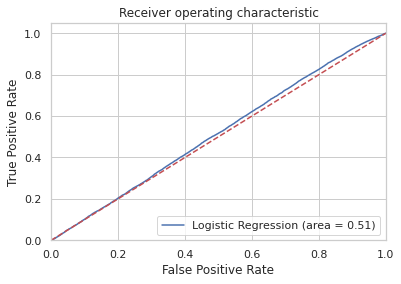

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()